In [1]:
import pymysql
from dotenv import load_dotenv
import os
import sys
sys.path.append(os.path.abspath("../src"))




In [ ]:
load_dotenv()
conn = pymysql.connect(
    host="localhost",
    user="root",
    password=os.getenv("MYSQL_PASSWORD"),
    database="cricstats"
)
print("✅ Connected")
conn.close()

In [ ]:


from data.db_loader import load_matches_to_db, load_deliveries_to_db

load_matches_to_db("../data/matches.csv")
load_deliveries_to_db("../data/deliveries.csv")


c:\Users\singh_7l8q9pm\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


✅ Loaded 636 rows into matches
✅ Loaded 150460 rows into deliveries


In [3]:
import pandas as pd
df = pd.read_csv("../data/deliveries.csv")
print("Columns:", df.columns.tolist())
print("Shape:", df.shape)


Columns: ['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind', 'fielder']
Shape: (150460, 21)


In [ ]:
from agents.langchain_sql_agent import ask_sql

res = ask_sql("plot player comparison between V Kohli in 2016")
print(res["sql"])
res["df"].head()




> Entering new SQL Agent Executor chain...
```sql
SELECT
    SUM(total_runs)
FROM
    deliveries
INNER JOIN
    matches
ON
    deliveries.match_id = matches.id
WHERE
    season = 2016 AND batsman = 'V Kohli'
LIMIT 100;
```

> Finished chain.
SELECT SUM(total_runs) FROM deliveries INNER JOIN matches ON deliveries.match_id = matches.id WHERE season = 2016 AND batsman = 'V Kohli' LIMIT 100;


d:\BITS Pilani\Year 4\Sem 4-2\LLM\Project\cricket-stats-gpt\src\agents\langchain_sql_agent.py:64: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_cleaned, connect_db())


,SUM(total_runs)
0,998.0


In [5]:
from agents.tool_registry import (
    get_comparison,
    get_top_scorers,
    get_score_prediction,
    get_match_summary
)


In [7]:
get_comparison.invoke({"player1": "V Kohli", "player2": "S Dhawan"})


d:\BITS Pilani\Year 4\Sem 4-2\LLM\Project\cricket-stats-gpt\src\analytics\comparisons.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, connect_db())


'     player  innings  total_runs  fours  sixes  balls_faced  strike_rate\n0  S Dhawan     3005      3561.0  401.0   71.0         3005       118.50\n1   V Kohli     3494      4423.0  384.0  160.0         3494       126.59'

c:\Users\singh_7l8q9pm\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
d:\BITS Pilani\Year 4\Sem 4-2\LLM\Project\cricket-stats-gpt\src\agents\multitool_agent.py:30: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  agent = initialize_agent(




> Entering new AgentExecutor chain...
Thought: I need to compare V Kohli and S Dhawan using a chart.
Action: chart_player_comparison
Action Input: V Kohli vs S Dhawan

d:\BITS Pilani\Year 4\Sem 4-2\LLM\Project\cricket-stats-gpt\src\analytics\comparisons.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, connect_db())


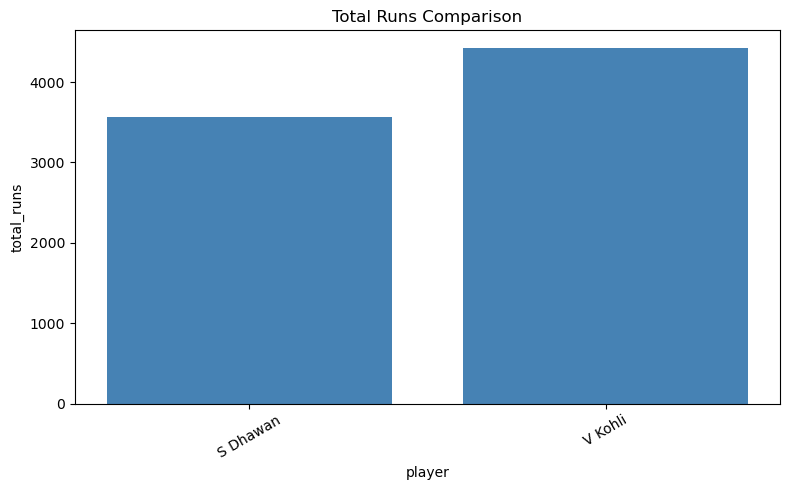

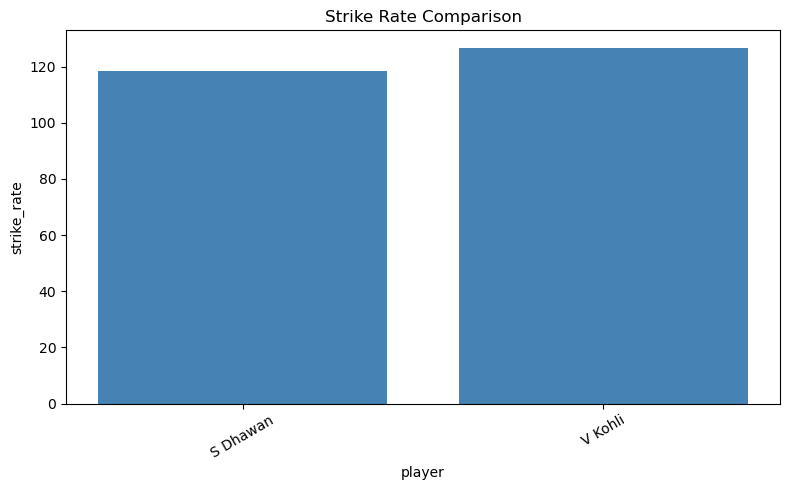


Observation: Final Answer: Showing bar charts for V Kohli vs S Dhawan
Thought:

> Finished chain.


{'input': 'plot player comparison between V Kohli and S Dhawan',
 'output': 'Agent stopped due to iteration limit or time limit.'}

In [2]:
from agents.multitool_agent import get_multitool_agent

agent = get_multitool_agent()
agent.invoke("plot player comparison between V Kohli and S Dhawan")

